In [1]:
import numpy as npy
import matplotlib.pyplot as plt
import seaborn as sns



size_gen = 100
data_a = []
data_b = []
data_y = []
error = []
gradiente_m = []
gradiente_b = []

m=3
b=4
error_promedio=0
gb_prom=0
gm_prom=0

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)


In [2]:
def generar_listado_a():
    return list(npy.random.randint(low = 5,high=100,size=size_gen))

def generar_listado_b():
    #return list(npy.random.poisson(800, size_gen))
    return npy.random.uniform(2.1, 40.5, size_gen)


def generar_listado_y_hat(data_a):
    for n in data_a:     
        data_y.append(n*m+b)              
    return data_y
     
def generar_listado_error(data_b,data_y):
    for n in range(size_gen):         
        error.append(((data_y[n]-data_b[n])**2)/2)            
    return error


def generar_listado_gradiente_m(data_a,data_b,data_y):
    for n in range(size_gen):         
        gradiente_m.append((data_y[n]-data_b[n])*data_a[n])            
    return gradiente_m

def generar_listado_gradiente_b(data_b,data_y):
    for n in range(size_gen):         
        gradiente_b.append((data_y[n]-data_b[n]))            
    return gradiente_b     


def genera_listado():
    function_A=[]  

    
    npy.save('A', npy.array(generar_listado_a()))
    npy.save('B', npy.array(generar_listado_b()))
 
    data_a=npy.load('A.npy')
    data_b=npy.load('B.npy')

    sns.scatterplot(data_a, data_b)

    
    
    data_y=generar_listado_y_hat(data_a)

    generar_listado_error(data_b,data_y) 
    error_promedio = npy.mean(error)
    
    gradiente_m = generar_listado_gradiente_m(data_a,data_b,data_y)
    gradiente_b = generar_listado_gradiente_b(data_b,data_y)

    
    gb_prom=npy.mean(gradiente_b)
    gm_prom=npy.mean(gradiente_m)


    for x in range(10): 
        x*gm_prom+gb_prom
        function_A.append(x*gm_prom+gb_prom)
    
    return(function_A)

In [3]:
def operar_listado_doble():
  function_A=[]  
  function_B=[] 
  
  npy.save('A', npy.array(generar_listado_a()))
  npy.save('B', npy.array(generar_listado_b()))
  
  npy.save('C', npy.array(generar_listado_a()))
  npy.save('D', npy.array(generar_listado_b()))
  
  data_a=npy.load('A.npy')
  data_b=npy.load('B.npy')
  
  data_c=npy.load('C.npy')
  data_d=npy.load('D.npy')
  

  
  sns.scatterplot(data_a, data_b)
  sns.scatterplot(data_c, data_d)
  
  
  data_y=generar_listado_y_hat(data_a)
  data_y_c=generar_listado_y_hat(data_c)
  
  generar_listado_error(data_b,data_y) 
  generar_listado_error(data_d,data_y) 
  error_promedio = npy.mean(error)
  
  gradiente_m = generar_listado_gradiente_m(data_a,data_b,data_y)
  gradiente_b = generar_listado_gradiente_b(data_b,data_y)
  
  
  gradiente_mi = generar_listado_gradiente_m(data_c,data_d,data_y_c)
  gradiente_bi = generar_listado_gradiente_b(data_d,data_y_c)
  
  
  gb_prom=npy.mean(gradiente_b)
  gm_prom=npy.mean(gradiente_m)
  
  gb_prom_c=npy.mean(gradiente_bi)
  gm_prom_c=npy.mean(gradiente_mi)

  for x in range(10): 
      x*gm_prom+gb_prom
      function_A.append(x*gm_prom+gb_prom)
      
  for x in range(10): 
      x*gm_prom_c+gb_prom_c
      function_B.append(x*gm_prom_c+gb_prom_c)      
      
  from sklearn.metrics import mean_absolute_percentage_error   
  
  mean_absolute_percentage_error(function_A, function_B)
    
  #plt.plot(function)   
  print(function_A)
  print(function_B)
  return mean_absolute_percentage_error(function_A, function_B)

C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[149.37202145054673, 9446.21516029424, 18743.058299137934, 28039.901437981625, 37336.74457682532, 46633.58771566901, 55930.4308545127, 65227.27399335639, 74524.11713220009, 83820.96027104378]
[149.37202145054673, 9446.21516029424, 18743.058299137934, 28039.901437981625, 37336.74457682532, 46633.58771566901, 55930.4308545127, 65227.27399335639, 74524.11713220009, 83820.96027104378]
0.0


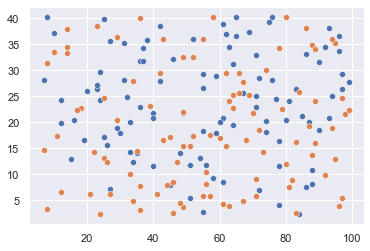

In [5]:
print(operar_listado_doble())
